In [1]:
import time
import numpy as np
import pandas as pd
import os
import sys
import sklearn
import datetime
import random
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, BatchNormalization, GlobalAveragePooling2D  
from tensorflow.keras.backend import batch_normalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from packaging import version
%matplotlib inline

In [2]:
#identify GPU
device_name = tf.test.gpu_device_name()
if not tf.test.is_gpu_available():
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction = 0.75)
sess = tf.compat.v1.Session(config = tf.compat.v1.ConfigProto(gpu_options = gpu_options))

In [4]:
print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.0.0


**Loading dataset**

In [56]:
#train data
X_train = np.load(os.path.join("Data/256", "X_train.npy"))
y_train = np.load(os.path.join("Data/256", "train_labels_multi.npy"))
y_train_bi = np.load(os.path.join("Data/256", "y_train.npy"))

#test data
X_test = np.load(os.path.join("Data/256", "X_test.npy"))
y_test = np.load(os.path.join("Data/256", "y_test_labels_multi.npy"))
y_test_bi = np.load(os.path.join("Data/256", "y_test.npy"))

#validation data
X_val = np.load(os.path.join("Data/256", "X_val.npy"))
y_val = np.load(os.path.join("Data/256", "y_val_labels_multi.npy"))
y_val_bi = np.load(os.path.join("Data/256", "y_val.npy"))

In [6]:
#train data
print("X_train data:", X_train.shape)
print("y_train data:", y_train.shape)

X_train data: (41406, 256, 256, 1)
y_train data: (41406,)


In [7]:
#validation data
print("X_validation data:", X_val.shape)
print("y_validation data:", y_val.shape)

X_validation data: (4656, 256, 256, 1)
y_validation data: (4656,)


In [8]:
#test data
print("X_test data:", X_test.shape)
print("y_test data:", y_test.shape)

X_test data: (4656, 256, 256, 1)
y_test data: (4656,)


**Convert Label for categorical_crossentropy loss** 

In [62]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

#binary
y_train_bi = to_categorical(y_train_bi)
y_val_bi = to_categorical(y_val_bi)
y_test_bi = to_categorical(y_test_bi)

**Normalization**

In [10]:
# scale pixels
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

## CNN Model No. 1 with 1 VGG Block

In [11]:
classes = 5
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(classes, activation='softmax'))
    # compile model
    opt = Adam(lr=0.001, beta_1=0.9, beta_2 = 0.999)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
model = define_model()

In [13]:
# fit model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Train on 41406 samples, validate on 4656 samples
Epoch 1/50
41406/41406 [==============================] - 91s 2ms/sample - loss: 1.4408 - accuracy: 0.8005 - val_loss: 0.6776 - val_accuracy: 0.7983
Epoch 2/50
41406/41406 [==============================] - 85s 2ms/sample - loss: 0.6481 - accuracy: 0.8073 - val_loss: 0.6427 - val_accuracy: 0.8026
Epoch 3/50
41406/41406 [==============================] - 85s 2ms/sample - loss: 0.6319 - accuracy: 0.8106 - val_loss: 0.6353 - val_accuracy: 0.8007
Epoch 4/50
41406/41406 [==============================] - 85s 2ms/sample - loss: 0.6241 - accuracy: 0.8134 - val_loss: 0.6390 - val_accuracy: 0.8037
Epoch 5/50
41406/41406 [==============================] - 85s 2ms/sample - loss: 0.6013 - accuracy: 0.8176 - val_loss: 0.6403 - val_accuracy: 0.8030
Epoch 6/50
41406/41406 [==============================] - 85s 2ms/sample - loss: 0.6034 - accuracy: 0.8186 - val_loss: 0.6229 - val_accuracy: 0.8015
Epoch 7/50
41406/41406 [==============================] -

In [14]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

In [15]:
print('> %.3f' % (acc * 100.0))

> 82.066


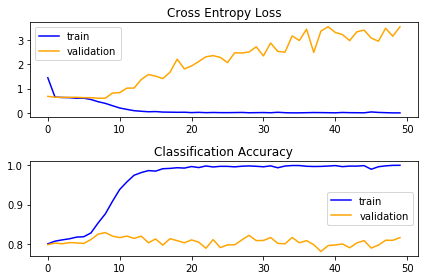

In [16]:
ax1 = plt.subplot(211)
plt.title('Cross Entropy Loss')
ax1.plot(history.history['loss'], color='blue', label='train')
ax1.plot(history.history['val_loss'], color='orange', label='validation')
ax1.legend()
    # plot accuracy
ax2 = plt.subplot(212)
plt.title('Classification Accuracy')
ax2.plot(history.history['accuracy'], color='blue', label='train')
ax2.plot(history.history['val_accuracy'], color='orange', label='validation')
ax2.legend()
plt.tight_layout()

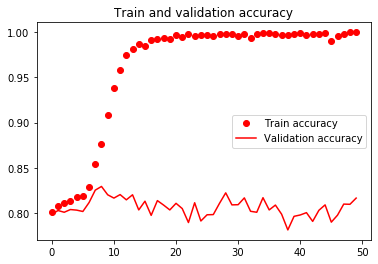

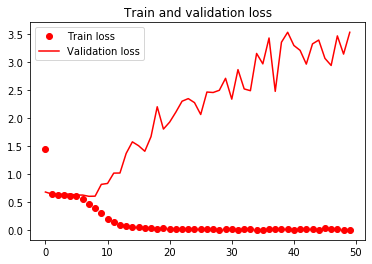

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train and validation loss')
plt.legend()
plt.show()

## CNN Model No. 2 with 2 VGG Blocks

In [61]:
classes = 5
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(classes, activation='softmax'))
    # compile model
    opt = Adam(lr=0.001, beta_1=0.9, beta_2 = 0.999)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [62]:
model = define_model()

In [63]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Train on 41406 samples, validate on 4656 samples
Epoch 1/50
41406/41406 [==============================] - 131s 3ms/sample - loss: 0.8212 - accuracy: 0.8016 - val_loss: 0.6603 - val_accuracy: 0.8009
Epoch 2/50
41406/41406 [==============================] - 131s 3ms/sample - loss: 0.6576 - accuracy: 0.8062 - val_loss: 0.6572 - val_accuracy: 0.8003
Epoch 3/50
41406/41406 [==============================] - 130s 3ms/sample - loss: 0.6464 - accuracy: 0.8065 - val_loss: 0.6386 - val_accuracy: 0.8005
Epoch 4/50
41406/41406 [==============================] - 130s 3ms/sample - loss: 0.6198 - accuracy: 0.8106 - val_loss: 0.6438 - val_accuracy: 0.8007
Epoch 5/50
41406/41406 [==============================] - 130s 3ms/sample - loss: 0.5882 - accuracy: 0.8130 - val_loss: 0.5736 - val_accuracy: 0.8035
Epoch 6/50
41406/41406 [==============================] - 130s 3ms/sample - loss: 0.5045 - accuracy: 0.8325 - val_loss: 0.4436 - val_accuracy: 0.8482
Epoch 7/50
41406/41406 [===========================

In [64]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

In [65]:
print('> %.3f' % (acc * 100.0))

> 84.472


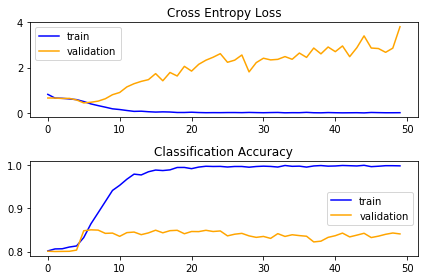

In [66]:
ax1 = plt.subplot(211)
plt.title('Cross Entropy Loss')
ax1.plot(history.history['loss'], color='blue', label='train')
ax1.plot(history.history['val_loss'], color='orange', label='validation')
ax1.legend()
    # plot accuracy
ax2 = plt.subplot(212)
plt.title('Classification Accuracy')
ax2.plot(history.history['accuracy'], color='blue', label='train')
ax2.plot(history.history['val_accuracy'], color='orange', label='validation')
ax2.legend()
plt.tight_layout()

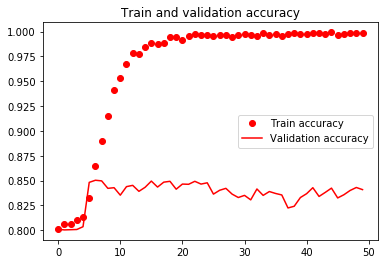

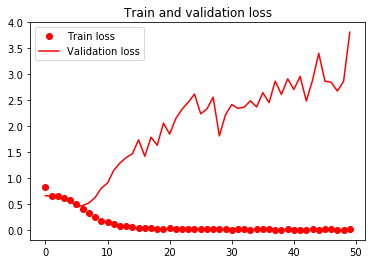

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train and validation loss')
plt.legend()
plt.show()

## CNN Model No. 3 with 3 VGG Blocks

In [13]:
classes = 5
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(classes, activation='softmax'))
    # compile model
    opt = Adam(lr=0.001, beta_1=0.9, beta_2 = 0.999)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
model = define_model()

In [16]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Train on 41406 samples, validate on 4656 samples
Epoch 1/50
41406/41406 [==============================] - 142s 3ms/sample - loss: 0.6205 - accuracy: 0.8051 - val_loss: 0.7587 - val_accuracy: 0.8020
Epoch 2/50
41406/41406 [==============================] - 136s 3ms/sample - loss: 0.4689 - accuracy: 0.8388 - val_loss: 0.4795 - val_accuracy: 0.8338
Epoch 3/50
41406/41406 [==============================] - 136s 3ms/sample - loss: 0.4029 - accuracy: 0.8597 - val_loss: 0.4721 - val_accuracy: 0.8520
Epoch 4/50
41406/41406 [==============================] - 136s 3ms/sample - loss: 0.3373 - accuracy: 0.8802 - val_loss: 0.3895 - val_accuracy: 0.8595
Epoch 5/50
41406/41406 [==============================] - 136s 3ms/sample - loss: 0.2769 - accuracy: 0.9014 - val_loss: 0.4424 - val_accuracy: 0.8595
Epoch 6/50
41406/41406 [==============================] - 136s 3ms/sample - loss: 0.2280 - accuracy: 0.9209 - val_loss: 0.5397 - val_accuracy: 0.8550
Epoch 7/50
41406/41406 [===========================

In [18]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

In [19]:
print('> %.3f' % (acc * 100.0))

> 85.116


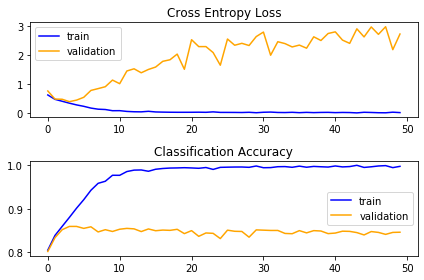

In [20]:
ax1 = plt.subplot(211)
plt.title('Cross Entropy Loss')
ax1.plot(history.history['loss'], color='blue', label='train')
ax1.plot(history.history['val_loss'], color='orange', label='validation')
ax1.legend()
    # plot accuracy
ax2 = plt.subplot(212)
plt.title('Classification Accuracy')
ax2.plot(history.history['accuracy'], color='blue', label='train')
ax2.plot(history.history['val_accuracy'], color='orange', label='validation')
ax2.legend()
plt.tight_layout()

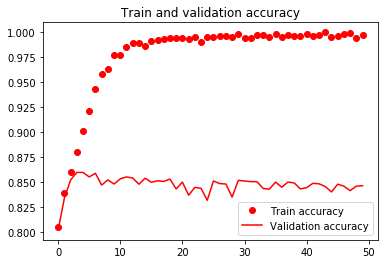

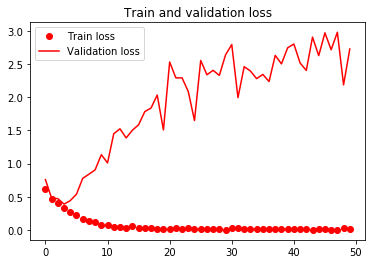

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train and validation loss')
plt.legend()
plt.show()

## CNN Model No. 4 3VGG Blocks with Dropout

In [71]:
classes = 5
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(classes, activation='softmax'))
    # compile model
    opt = Adam(lr=0.001, beta_1=0.9, beta_2 = 0.999)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [74]:
model = define_model()

In [73]:
history = model.fit(X_train, y_multi_train1, epochs=50, batch_size=32, validation_data=(X_val, y_multi_val1))

Train on 41406 samples, validate on 4656 samples
Epoch 1/50
41406/41406 [==============================] - 141s 3ms/sample - loss: 0.8649 - accuracy: 0.8009 - val_loss: 1.1347 - val_accuracy: 0.7957
Epoch 2/50
41406/41406 [==============================] - 140s 3ms/sample - loss: 0.6152 - accuracy: 0.8046 - val_loss: 1.1485 - val_accuracy: 0.7981
Epoch 3/50
41406/41406 [==============================] - 138s 3ms/sample - loss: 0.6108 - accuracy: 0.8080 - val_loss: 1.1002 - val_accuracy: 0.7973
Epoch 4/50
41406/41406 [==============================] - 139s 3ms/sample - loss: 0.5938 - accuracy: 0.8124 - val_loss: 1.0142 - val_accuracy: 0.8011
Epoch 5/50
41406/41406 [==============================] - 139s 3ms/sample - loss: 0.5844 - accuracy: 0.8167 - val_loss: 1.3325 - val_accuracy: 0.8003
Epoch 6/50
41406/41406 [==============================] - 139s 3ms/sample - loss: 0.5572 - accuracy: 0.8195 - val_loss: 0.9861 - val_accuracy: 0.8033
Epoch 7/50
41406/41406 [===========================

In [77]:
_, acc = model.evaluate(X_test, y_multi_test1, verbose=0)

In [76]:
print('> %.3f' % (acc * 100.0))

> 4.446


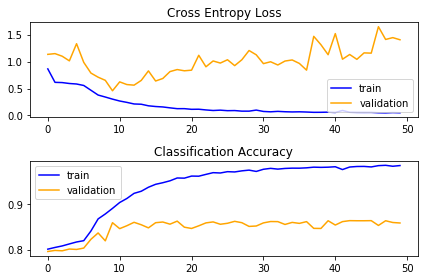

In [78]:
ax1 = plt.subplot(211)
plt.title('Cross Entropy Loss')
ax1.plot(history.history['loss'], color='blue', label='train')
ax1.plot(history.history['val_loss'], color='orange', label='validation')
ax1.legend()
    # plot accuracy
ax2 = plt.subplot(212)
plt.title('Classification Accuracy')
ax2.plot(history.history['accuracy'], color='blue', label='train')
ax2.plot(history.history['val_accuracy'], color='orange', label='validation')
ax2.legend()
plt.tight_layout()

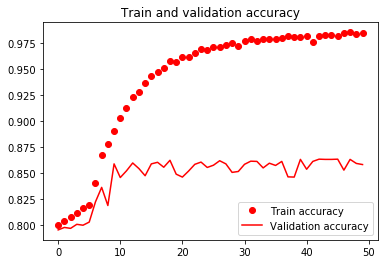

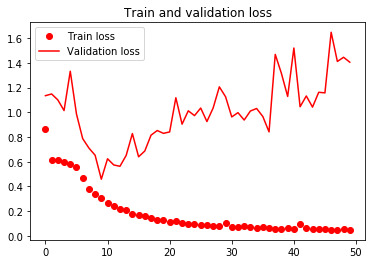

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train and validation loss')
plt.legend()
plt.show()

## CNN Model No. 5 3 VGG Blocks with Dropout variation and Batch Normalization

In [47]:
classes = 5
def define_model1():
    model1 = Sequential()
    model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
    model1.add(BatchNormalization())
    model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Dropout(0.2))
    model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Dropout(0.3))
    model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Dropout(0.4))
    model1.add(Flatten())
    model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.5))
    model1.add(Dense(classes, activation='softmax'))
    # compile model
    opt = Adam(lr=0.001, beta_1=0.9, beta_2 = 0.999)
    model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model1

In [48]:
model1 = define_model1()

In [50]:
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Train on 41406 samples, validate on 4656 samples
Epoch 1/50
41406/41406 [==============================] - 178s 4ms/sample - loss: 0.3365 - accuracy: 0.8775 - val_loss: 0.3243 - val_accuracy: 0.8791
Epoch 2/50
41406/41406 [==============================] - 178s 4ms/sample - loss: 0.3226 - accuracy: 0.8817 - val_loss: 0.3759 - val_accuracy: 0.8675
Epoch 3/50
41406/41406 [==============================] - 170s 4ms/sample - loss: 0.3067 - accuracy: 0.8858 - val_loss: 0.3344 - val_accuracy: 0.8763
Epoch 4/50
41406/41406 [==============================] - 171s 4ms/sample - loss: 0.2901 - accuracy: 0.8932 - val_loss: 0.5399 - val_accuracy: 0.8174
Epoch 5/50
41406/41406 [==============================] - 171s 4ms/sample - loss: 0.2674 - accuracy: 0.8983 - val_loss: 0.3627 - val_accuracy: 0.8737
Epoch 6/50
41406/41406 [==============================] - 171s 4ms/sample - loss: 0.2535 - accuracy: 0.9054 - val_loss: 0.3924 - val_accuracy: 0.8653
Epoch 7/50
41406/41406 [===========================

In [51]:
_, acc = model1.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 89.454


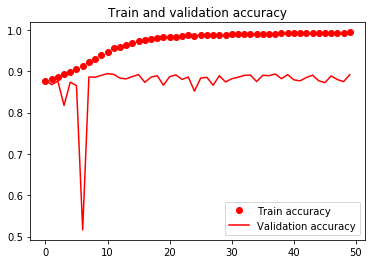

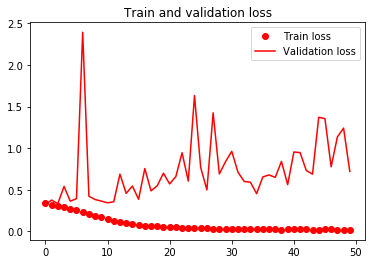

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train and validation loss')
plt.legend()
plt.show()

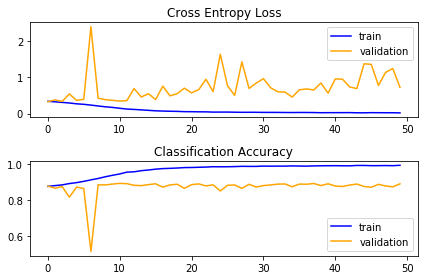

In [53]:
ax1 = plt.subplot(211)
plt.title('Cross Entropy Loss')
ax1.plot(history1.history['loss'], color='blue', label='train')
ax1.plot(history1.history['val_loss'], color='orange', label='validation')
ax1.legend()

# plot accuracy
ax2 = plt.subplot(212)
plt.title('Classification Accuracy')
ax2.plot(history1.history['accuracy'], color='blue', label='train')
ax2.plot(history1.history['val_accuracy'], color='orange', label='validation')
ax2.legend()
plt.tight_layout()

In [54]:
# save model and architecture to single file
model1.save("pretrained_model/ConvNet_multiNo5_1.h5")

**Old Result**

In [49]:
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Train on 41406 samples, validate on 4656 samples
Epoch 1/50
41406/41406 [==============================] - 315s 8ms/sample - loss: 0.6255 - accuracy: 0.8143 - val_loss: 0.5775 - val_accuracy: 0.8449
Epoch 2/50
41406/41406 [==============================] - 258s 6ms/sample - loss: 0.4474 - accuracy: 0.8508 - val_loss: 0.4433 - val_accuracy: 0.8449
Epoch 3/50
41406/41406 [==============================] - 257s 6ms/sample - loss: 0.4048 - accuracy: 0.8611 - val_loss: 2.9837 - val_accuracy: 0.7672
Epoch 4/50
41406/41406 [==============================] - 257s 6ms/sample - loss: 0.3628 - accuracy: 0.8704 - val_loss: 0.3709 - val_accuracy: 0.8679
Epoch 5/50
41406/41406 [==============================] - 257s 6ms/sample - loss: 0.3344 - accuracy: 0.8786 - val_loss: 0.3339 - val_accuracy: 0.8776
Epoch 6/50
41406/41406 [==============================] - 257s 6ms/sample - loss: 0.3224 - accuracy: 0.8837 - val_loss: 0.3418 - val_accuracy: 0.8827
Epoch 7/50
41406/41406 [===========================

In [52]:
_, acc = model1.evaluate(X_test, y_multi_test1, verbose=0)

In [53]:
print('> %.3f' % (acc * 100.0))

> 88.359


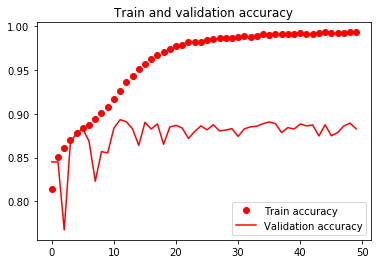

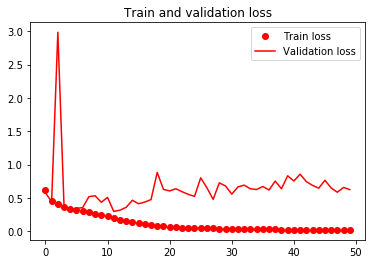

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train and validation loss')
plt.legend()
plt.show()

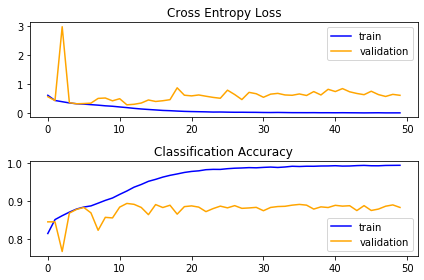

In [57]:
ax1 = plt.subplot(211)
plt.title('Cross Entropy Loss')
ax1.plot(history1.history['loss'], color='blue', label='train')
ax1.plot(history1.history['val_loss'], color='orange', label='validation')
ax1.legend()
    # plot accuracy
ax2 = plt.subplot(212)
plt.title('Classification Accuracy')
ax2.plot(history1.history['accuracy'], color='blue', label='train')
ax2.plot(history1.history['val_accuracy'], color='orange', label='validation')
ax2.legend()
plt.tight_layout()

## CNN Model No. 5.2 4 VGG Blocks with Dropout and BatchNormalization 

In [175]:
classes = 5
def define_model12():
    model1 = Sequential()
    model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
    model1.add(BatchNormalization())
    model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Dropout(0.2))
    model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Dropout(0.3))
    model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Dropout(0.4))
    model1.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Dropout(0.4))
    model1.add(Flatten())
    model1.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.5))
    model1.add(Dense(classes, activation='softmax'))
    # compile model
    opt = Adam(lr=0.001, beta_1=0.9, beta_2 = 0.999)
    model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model1

In [176]:
model12 = define_model12()

In [177]:
history12 = model12.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Train on 41406 samples, validate on 4656 samples
Epoch 1/50
41406/41406 [==============================] - 197s 5ms/sample - loss: 0.6380 - accuracy: 0.8093 - val_loss: 0.4385 - val_accuracy: 0.8494
Epoch 2/50
41406/41406 [==============================] - 195s 5ms/sample - loss: 0.4393 - accuracy: 0.8524 - val_loss: 0.4995 - val_accuracy: 0.8256
Epoch 3/50
41406/41406 [==============================] - 195s 5ms/sample - loss: 0.4053 - accuracy: 0.8602 - val_loss: 0.5420 - val_accuracy: 0.8142
Epoch 4/50
41406/41406 [==============================] - 195s 5ms/sample - loss: 0.3578 - accuracy: 0.8729 - val_loss: 0.5264 - val_accuracy: 0.8168
Epoch 5/50
41406/41406 [==============================] - 195s 5ms/sample - loss: 0.3295 - accuracy: 0.8794 - val_loss: 0.4088 - val_accuracy: 0.8634
Epoch 6/50
41406/41406 [==============================] - 195s 5ms/sample - loss: 0.3130 - accuracy: 0.8864 - val_loss: 0.5250 - val_accuracy: 0.8340
Epoch 7/50
41406/41406 [===========================

In [178]:
# save model and architecture to single file
model12.save("pretrained_model/ConvNet_multiNo5_2.h5")

In [179]:
_, acc = model12.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 90.657


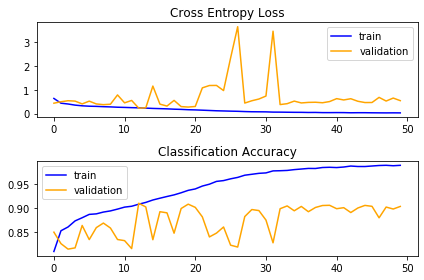

In [185]:
ax1 = plt.subplot(211)
plt.title('Cross Entropy Loss')
ax1.plot(history12.history['loss'], color='blue', label='train')
ax1.plot(history12.history['val_loss'], color='orange', label='validation')
ax1.legend()
    # plot accuracy
ax2 = plt.subplot(212)
plt.title('Classification Accuracy')
ax2.plot(history12.history['accuracy'], color='blue', label='train')
ax2.plot(history12.history['val_accuracy'], color='orange', label='validation')
ax2.legend()
plt.tight_layout()

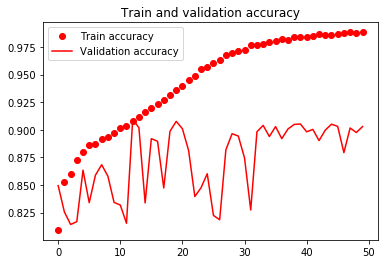

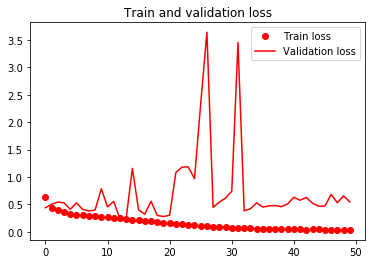

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history12.history['accuracy']
val_accuracy = history12.history['val_accuracy']
loss = history12.history['loss']
val_loss = history12.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train and validation loss')
plt.legend()
plt.show()

In [11]:
classes = 5
def define_model13():
    model1 = Sequential()
    model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
    model1.add(BatchNormalization())
    model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Dropout(0.2))
    model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Dropout(0.3))
    model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Dropout(0.4))
    model1.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Dropout(0.4))
    model1.add(Flatten())
    model1.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.5))
    model1.add(Dense(classes, activation='softmax'))
    # compile model
    opt = Adam(lr=0.001, beta_1=0.9, beta_2 = 0.999)
    model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model1

In [12]:
model13 = define_model13()

In [15]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train1), y_train1)

In [16]:
class_weights

array([0.25002868, 2.87741487, 4.11590457, 5.03110571, 4.7348199 ])

In [17]:
history13 = model13.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), class_weight=class_weights)

Train on 41406 samples, validate on 4656 samples
Epoch 1/50
41406/41406 [==============================] - 206s 5ms/sample - loss: 0.6557 - accuracy: 0.8114 - val_loss: 0.5950 - val_accuracy: 0.8258
Epoch 2/50
41406/41406 [==============================] - 195s 5ms/sample - loss: 0.4466 - accuracy: 0.8482 - val_loss: 0.4727 - val_accuracy: 0.8378
Epoch 3/50
41406/41406 [==============================] - 197s 5ms/sample - loss: 0.4119 - accuracy: 0.8572 - val_loss: 0.4363 - val_accuracy: 0.8501
Epoch 4/50
41406/41406 [==============================] - 195s 5ms/sample - loss: 0.4012 - accuracy: 0.8579 - val_loss: 0.4039 - val_accuracy: 0.8524
Epoch 5/50
41406/41406 [==============================] - 197s 5ms/sample - loss: 0.3903 - accuracy: 0.8607 - val_loss: 0.4116 - val_accuracy: 0.8524
Epoch 6/50
41406/41406 [==============================] - 197s 5ms/sample - loss: 0.3780 - accuracy: 0.8642 - val_loss: 0.4398 - val_accuracy: 0.8499
Epoch 7/50
41406/41406 [===========================

In [18]:
# save model and architecture to single file
model13.save("pretrained_model/ConvNet_multiNo53_w.h5")

In [19]:
_, acc = model13.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 88.166


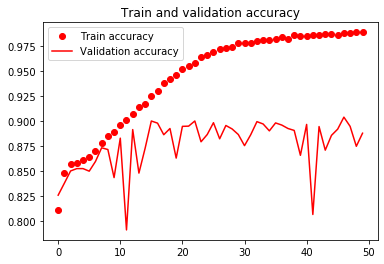

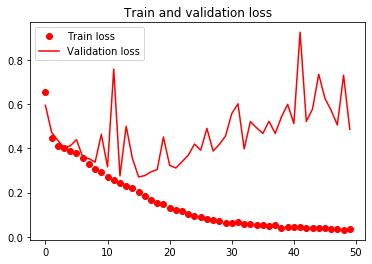

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history13.history['accuracy']
val_accuracy = history13.history['val_accuracy']
loss = history13.history['loss']
val_loss = history13.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train and validation loss')
plt.legend()
plt.show()

## CNN Model No. 5.3 3 VGG Blocks with Dropout, BatchNormalization and Weight Decay

In [13]:
classes = 5
param = 0.01
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(param), input_shape=X_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(param)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(param)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(param)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(param)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(param)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(param)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))
    # compile model
    opt = Adam(lr=0.001, beta_1=0.9, beta_2 = 0.999)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
model2 = define_model()

In [14]:
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Train on 41406 samples, validate on 4656 samples
Epoch 1/50
41406/41406 [==============================] - 180s 4ms/sample - loss: 3.4645 - accuracy: 0.8003 - val_loss: 1.4273 - val_accuracy: 0.7741
Epoch 2/50
41406/41406 [==============================] - 171s 4ms/sample - loss: 1.1180 - accuracy: 0.8342 - val_loss: 1.0715 - val_accuracy: 0.8005
Epoch 3/50
41406/41406 [==============================] - 172s 4ms/sample - loss: 1.0500 - accuracy: 0.8372 - val_loss: 1.0273 - val_accuracy: 0.8275
Epoch 4/50
41406/41406 [==============================] - 172s 4ms/sample - loss: 1.0763 - accuracy: 0.8411 - val_loss: 1.2545 - val_accuracy: 0.8220
Epoch 5/50
41406/41406 [==============================] - 172s 4ms/sample - loss: 1.1722 - accuracy: 0.8421 - val_loss: 1.5377 - val_accuracy: 0.8456
Epoch 6/50
41406/41406 [==============================] - 171s 4ms/sample - loss: 1.4375 - accuracy: 0.8407 - val_loss: 1.4675 - val_accuracy: 0.8456
Epoch 7/50
41406/41406 [===========================

In [15]:
_, acc = model2.evaluate(X_test, y_test, verbose=0)

In [16]:
print('> %.3f' % (acc * 100.0))

> 84.901


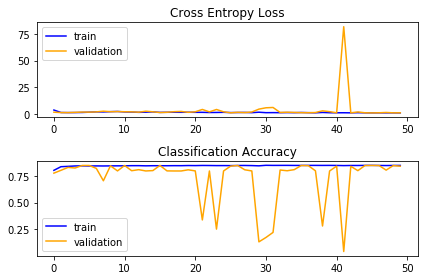

In [17]:
ax1 = plt.subplot(211)
plt.title('Cross Entropy Loss')
ax1.plot(history2.history['loss'], color='blue', label='train')
ax1.plot(history2.history['val_loss'], color='orange', label='validation')
ax1.legend()
    # plot accuracy
ax2 = plt.subplot(212)
plt.title('Classification Accuracy')
ax2.plot(history2.history['accuracy'], color='blue', label='train')
ax2.plot(history2.history['val_accuracy'], color='orange', label='validation')
ax2.legend()
plt.tight_layout()

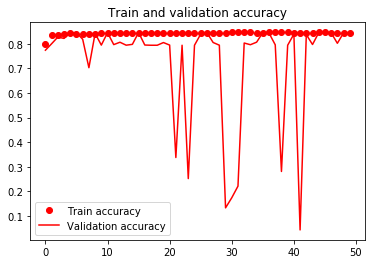

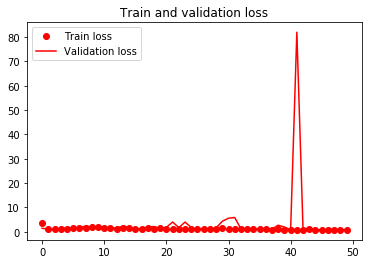

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train and validation loss')
plt.legend()
plt.show()

In [ ]:
# save model and architecture to single file
model2.save("trained_model/ConvNet1.h5")

## Binary Classification CNN Model No. 5.1 - 3 VGG Blocks with BatchNormalization, Droput, and Weight Decay

In [29]:
classes = 2
param = 0.01
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(param), input_shape=X_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(param)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(param)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(param)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(param)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(param)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(param)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))
    # compile model
    opt = Adam(lr=0.001, beta_1=0.9, beta_2 = 0.999)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [30]:
model3 = define_model()

In [31]:
history3 = model3.fit(X_train, y_train_bi, epochs=50, batch_size=32, validation_data=(X_val, y_val_bi))

Train on 41406 samples, validate on 4656 samples
Epoch 1/50
41406/41406 [==============================] - 282s 7ms/sample - loss: 3.4873 - accuracy: 0.8816 - val_loss: 1.1213 - val_accuracy: 0.8209
Epoch 2/50
41406/41406 [==============================] - 260s 6ms/sample - loss: 0.8325 - accuracy: 0.9147 - val_loss: 0.8614 - val_accuracy: 0.8559
Epoch 3/50
41406/41406 [==============================] - 262s 6ms/sample - loss: 0.6948 - accuracy: 0.9152 - val_loss: 0.7484 - val_accuracy: 0.8935
Epoch 4/50
41406/41406 [==============================] - 262s 6ms/sample - loss: 0.7721 - accuracy: 0.9149 - val_loss: 0.6704 - val_accuracy: 0.9255
Epoch 5/50
41406/41406 [==============================] - 260s 6ms/sample - loss: 0.7873 - accuracy: 0.9166 - val_loss: 0.8621 - val_accuracy: 0.9145
Epoch 6/50
41406/41406 [==============================] - 260s 6ms/sample - loss: 0.8387 - accuracy: 0.9174 - val_loss: 1.1994 - val_accuracy: 0.8565
Epoch 7/50
41406/41406 [===========================

In [32]:
# save model and architecture to single file
model3.save("pretrained_model/ConvNet_binary1.h5")

In [33]:
_, acc = model3.evaluate(X_test, y_test_bi, verbose=0)

In [34]:
print('> %.3f' % (acc * 100.0))

> 92.526


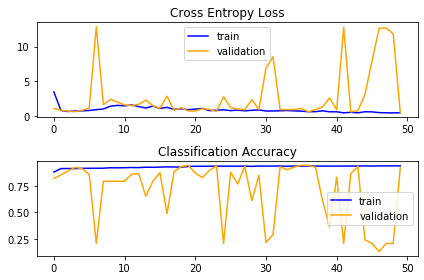

In [35]:
ax1 = plt.subplot(211)
plt.title('Cross Entropy Loss')
ax1.plot(history3.history['loss'], color='blue', label='train')
ax1.plot(history3.history['val_loss'], color='orange', label='validation')
ax1.legend()
    # plot accuracy
ax2 = plt.subplot(212)
plt.title('Classification Accuracy')
ax2.plot(history3.history['accuracy'], color='blue', label='train')
ax2.plot(history3.history['val_accuracy'], color='orange', label='validation')
ax2.legend()
plt.tight_layout()

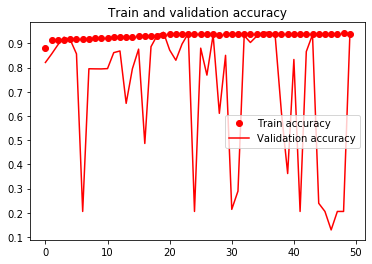

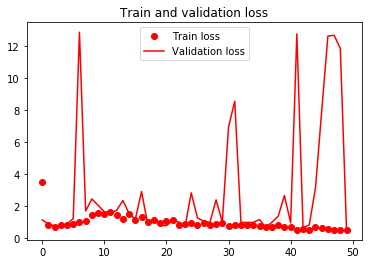

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train and validation loss')
plt.legend()
plt.show()

## Binary Classification CNN Model No. 5.2 - 4 VGG Blocks with BatchNormalization, Droput, and Weight Decay

In [12]:
classes = 2
def define_model21():
    model1 = Sequential()
    model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
    model1.add(BatchNormalization())
    model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Dropout(0.2))
    model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Dropout(0.3))
    model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Dropout(0.4))
    model1.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Dropout(0.4))
    model1.add(Flatten())
    model1.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.5))
    model1.add(Dense(classes, activation='softmax'))
    # compile model
    opt = Adam(lr=0.001, beta_1=0.9, beta_2 = 0.999)
    model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model1


In [13]:
model21 = define_model21()

In [199]:
history21 = model21.fit(X_train, y_train_bi, epochs=50, batch_size=32, validation_data=(X_val, y_val_bi))

Train on 41406 samples, validate on 4656 samples
Epoch 1/50
41406/41406 [==============================] - 182s 4ms/sample - loss: 0.2797 - accuracy: 0.9047 - val_loss: 0.2001 - val_accuracy: 0.9087
Epoch 2/50
41406/41406 [==============================] - 181s 4ms/sample - loss: 0.1723 - accuracy: 0.9374 - val_loss: 0.2227 - val_accuracy: 0.9068
Epoch 3/50
41406/41406 [==============================] - 181s 4ms/sample - loss: 0.1545 - accuracy: 0.9435 - val_loss: 0.1786 - val_accuracy: 0.9270
Epoch 4/50
41406/41406 [==============================] - 181s 4ms/sample - loss: 0.1346 - accuracy: 0.9499 - val_loss: 0.1196 - val_accuracy: 0.9564
Epoch 5/50
41406/41406 [==============================] - 182s 4ms/sample - loss: 0.1181 - accuracy: 0.9563 - val_loss: 0.1155 - val_accuracy: 0.9570
Epoch 6/50
41406/41406 [==============================] - 181s 4ms/sample - loss: 0.1190 - accuracy: 0.9557 - val_loss: 0.1136 - val_accuracy: 0.9487
Epoch 7/50
41406/41406 [===========================

In [201]:
# save model and architecture to single file
model21.save("pretrained_model/ConvNet_binary2.h5")

In [202]:
_, acc = model21.evaluate(X_test, y_test_bi, verbose=0)
print('> %.3f' % (acc * 100.0))

> 97.616


In [14]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train1), y_train1)

In [18]:
class_weights

array([0.25002868, 2.87741487, 4.11590457, 5.03110571, 4.7348199 ])

In [19]:
history21_w = model21.fit(X_train, y_train_bi, epochs=50, batch_size=32, validation_data=(X_val, y_val_bi), class_weight=class_weights)

Train on 41406 samples, validate on 4656 samples
Epoch 1/50
41406/41406 [==============================] - 207s 5ms/sample - loss: 0.2608 - accuracy: 0.9078 - val_loss: 1.0186 - val_accuracy: 0.8069
Epoch 2/50
41406/41406 [==============================] - 194s 5ms/sample - loss: 0.1754 - accuracy: 0.9344 - val_loss: 1.5317 - val_accuracy: 0.6428
Epoch 3/50
41406/41406 [==============================] - 193s 5ms/sample - loss: 0.1515 - accuracy: 0.9429 - val_loss: 0.2460 - val_accuracy: 0.9147
Epoch 4/50
41406/41406 [==============================] - 188s 5ms/sample - loss: 0.1405 - accuracy: 0.9453 - val_loss: 1.9527 - val_accuracy: 0.5642
Epoch 5/50
41406/41406 [==============================] - 198s 5ms/sample - loss: 0.1257 - accuracy: 0.9535 - val_loss: 0.6319 - val_accuracy: 0.7045
Epoch 6/50
41406/41406 [==============================] - 194s 5ms/sample - loss: 0.1159 - accuracy: 0.9563 - val_loss: 0.1151 - val_accuracy: 0.9613
Epoch 7/50
41406/41406 [===========================

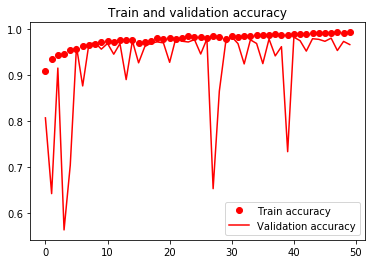

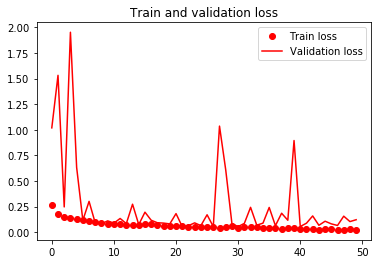

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history21_w.history['accuracy']
val_accuracy = history21_w.history['val_accuracy']
loss = history21_w.history['loss']
val_loss = history21_w.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train and validation loss')
plt.legend()
plt.show()

In [21]:
# save model and architecture to single file
model21.save("pretrained_model/ConvNet_binary2_class_weight.h5")

## Load Saved Model

In [11]:
from numpy import loadtxt
from tensorflow.keras.models import load_model

model_multi_52 = load_model('./pretrained_model/ConvNet_multiNo5_2.h5')

model_multi_52.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 64)     

In [14]:
y_train1 = np.load(os.path.join("Data/256", "train_labels_multi.npy"))
y_train_bi1 = np.load(os.path.join("Data/256", "y_train.npy"))
y_test1 = np.load(os.path.join("Data/256", "y_test_labels_multi.npy"))
y_test_bi1 = y_test_bi = np.load(os.path.join("Data/256", "y_test.npy"))
y_val1 = np.load(os.path.join("Data/256", "y_val_labels_multi.npy"))
y_val_bi1 = np.load(os.path.join("Data/256", "y_val.npy"))

## ROC AUC Curve - Binary Classification

In [145]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [102]:
pred3 = model3.predict(X_val, batch_size = 32, verbose=0)
pred4 = np.argmax(pred3, axis=1)

In [140]:
pred7 = []
for i in range(4656):
    pred7.append(np.min(pred3[i]))
   

In [141]:
pred8 = np.asarray(pred7)

In [142]:
pred8

array([0.08794478, 0.00078325, 0.05319108, ..., 0.22071818, 0.18314552,
       0.25551453], dtype=float32)

In [134]:
fpr, tpr, thresholds = roc_curve(y_val_bi1, pred6)

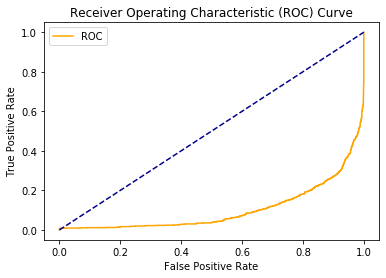

In [135]:
plot_roc_curve(fpr, tpr)

In [143]:
fpr, tpr, thresholds = roc_curve(y_val_bi1, pred8)

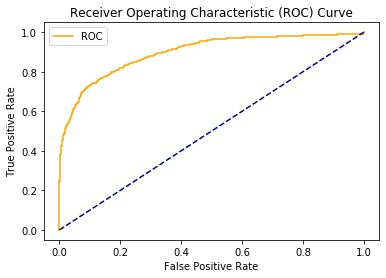

In [144]:
plot_roc_curve(fpr, tpr)

In [194]:
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize = [8,8])
    lw = 2
    plt.plot(fpr, tpr, color = 'darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle ='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

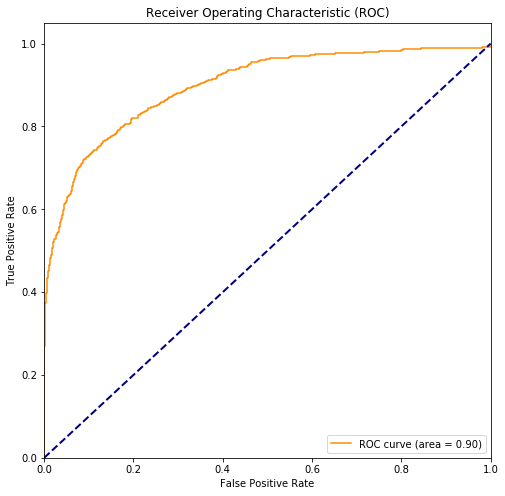

In [195]:
plot_roc(pred8, y_val_bi1)

In [50]:
def plot_roc_curve(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

**CNN Model No. 5.2**

In [52]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [53]:
pred21 = model_multi_52.predict(X_test, batch_size = 32, verbose=0)
pred22 = np.argmax(pred21, axis=1)


In [54]:
pred9 = []
for i in range(4656):
    pred9.append(np.min(pred21[i]))
pred10 = np.asarray(pred9)  

In [55]:
fpr, tpr, thresholds = roc_curve(y_test_bi1, pred10)

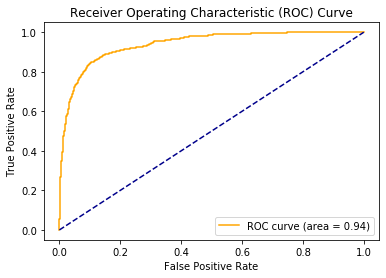

In [56]:
plot_roc_curve(fpr, tpr)

In [23]:
pred11 = []
for i in range(4656):
    pred11.append(np.max(pred21[i]))
pred12 = np.asarray(pred11) 

In [24]:
fpr, tpr, thresholds = roc_curve(y_test_bi1, pred12)

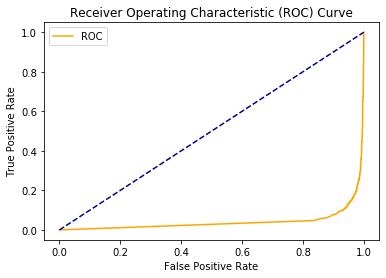

In [25]:
plot_roc_curve(fpr, tpr)

## ROC AUC Curve - Multi Classification

In [28]:
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [19]:
pred_mul = model1.predict(X_val, batch_size = 32, verbose = 0)
#pred_mul1 = np.argmax(pred_mul, axis=1)

In [20]:
pred_mul

array([[9.28052604e-01, 1.66755952e-02, 2.05979142e-02, 1.90909598e-02,
        1.55828735e-02],
       [9.98380303e-01, 2.71635654e-04, 4.84076678e-04, 5.01203176e-04,
        3.62819235e-04],
       [9.00449753e-01, 2.37723701e-02, 2.84405779e-02, 2.61057913e-02,
        2.12315302e-02],
       ...,
       [8.10656846e-02, 3.04056168e-01, 2.39884213e-01, 1.92605227e-01,
        1.82388693e-01],
       [7.89269567e-01, 5.39735518e-02, 5.85642420e-02, 5.34431152e-02,
        4.47495505e-02],
       [8.10012594e-02, 3.02877426e-01, 2.41651088e-01, 1.94681391e-01,
        1.79788798e-01]], dtype=float32)

In [185]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_val.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], pred_mul[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), pred_mul.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [186]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

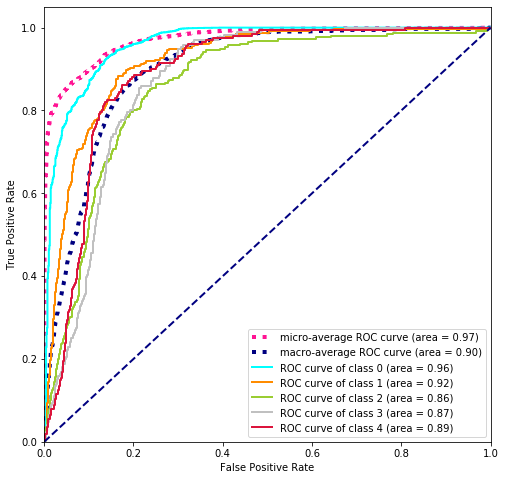

In [199]:
# Plot all ROC curves
plt.figure(figsize = [8, 8])
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'yellowgreen', 'silver', 'crimson'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle ='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

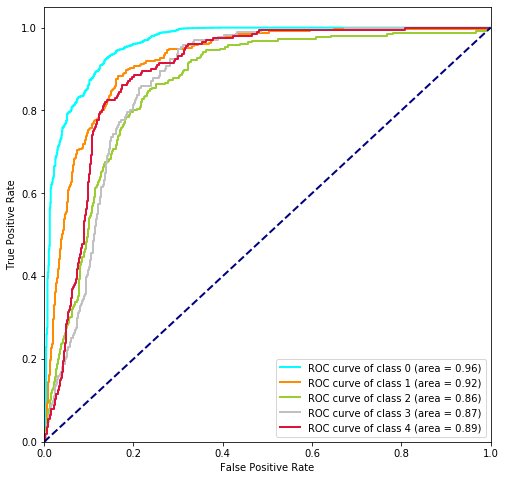

In [200]:
plt.figure(figsize = [8, 8])
lw = 2
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'yellowgreen', 'silver', 'crimson'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle ='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

**CNN Model No. 5.2**

In [ ]:
predictions5_2

In [26]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred21[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred21.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [29]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

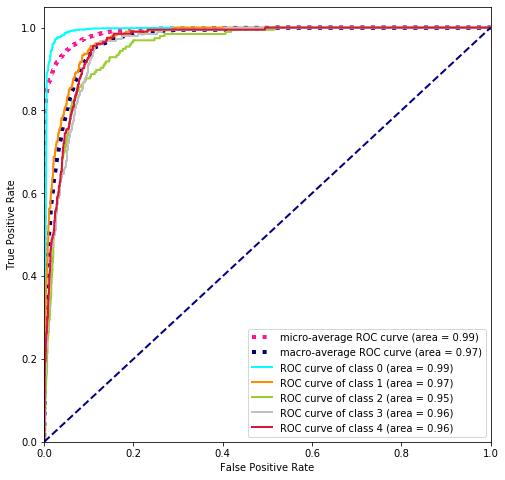

In [30]:
# Plot all ROC curves
plt.figure(1, figsize = [8, 8])
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'yellowgreen', 'silver', 'crimson'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle ='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

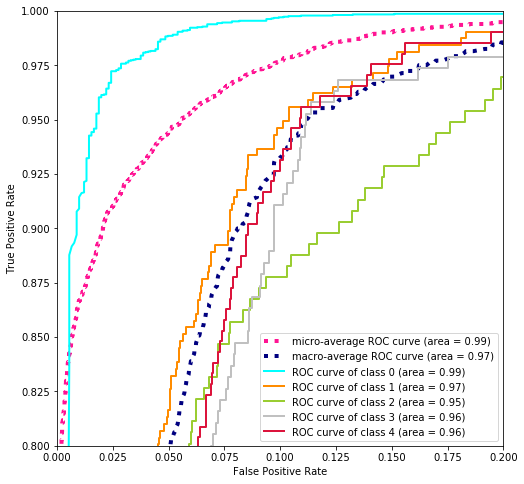

In [32]:
# Zoom in view of the upper left corner.
# Plot all ROC curves
plt.figure(figsize = [8, 8])
lw = 2

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'yellowgreen', 'silver', 'crimson'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle ='--')
plt.xlim([0.0, 0.2])
plt.ylim([0.8, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Calculate Classification Log Loss

In [33]:
from IPython.display import display

# Don't display numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Generate predictions
pred21

print("Numpy array of predictions")
display(pred21[0:5])

print("As percent probability")
print(pred21[0]*100)

score = metrics.log_loss(y_test, pred21)
print("Log loss score: {}".format(score))

pred = np.argmax(pred21,axis=1) # raw probabilities to chosen class (highest probability)

Numpy array of predictions


array([[1.    , 0.    , 0.    , 0.    , 0.    ],
       [1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.0026, 0.    , 0.9974],
       [1.    , 0.    , 0.    , 0.    , 0.    ],
       [1.    , 0.    , 0.    , 0.    , 0.    ]], dtype=float32)

As percent probability
[100.   0.   0.   0.   0.]
Log loss score: 0.5506851613103919


## Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_curve
#fpr_keras, tpr_keras, thresholds_keras = roc_curve(y1, pred_1)
from sklearn.metrics import auc
#auc_keras = auc(fpr_keras, tpr_keras)

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm - confusion matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [34]:
instances = pd.Index(['0','1','2','3','4'])

In [35]:
instances1 = pd.Index(['1','2','3','4', '0'])

In [58]:
instances1

Index(['1', '2', '3', '4', '0'], dtype='object')

**Multiclass**

Confusion matrix, without normalization
[[3745    0    3    1    1]
 [  24  204   35   30   23]
 [  41   25   93    3   34]
 [  38   75   22   43   12]
 [  31   25   61    7   80]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.  ]
 [0.08 0.65 0.11 0.09 0.07]
 [0.21 0.13 0.47 0.02 0.17]
 [0.2  0.39 0.12 0.23 0.06]
 [0.15 0.12 0.3  0.03 0.39]]


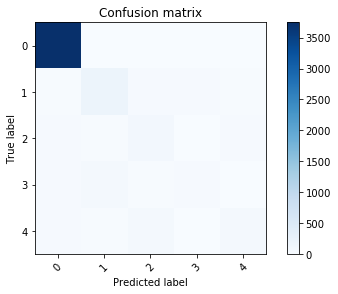

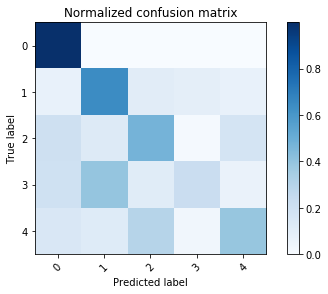

In [132]:
# Compute confusion matrix
y_compare = np.argmax(y_test, axis =1)
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, instances)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, instances, title='Normalized confusion matrix')

plt.show()

**CNN Model No. 5.2**

In [180]:
pred5_2 = model12.predict(X_test, verbose=0)

In [181]:
pred1 = np.argmax(pred5_2,axis=1)

Confusion matrix, without normalization
[[3742    1    4    1    2]
 [  19  216   27   34   20]
 [  38   14   99    9   36]
 [  25   64   19   68   14]
 [  26   19   55    8   96]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.  ]
 [0.06 0.68 0.09 0.11 0.06]
 [0.19 0.07 0.51 0.05 0.18]
 [0.13 0.34 0.1  0.36 0.07]
 [0.13 0.09 0.27 0.04 0.47]]


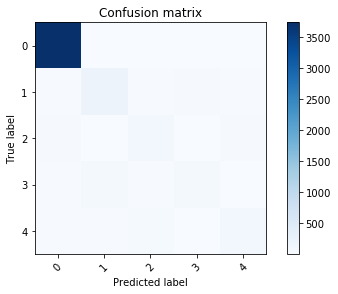

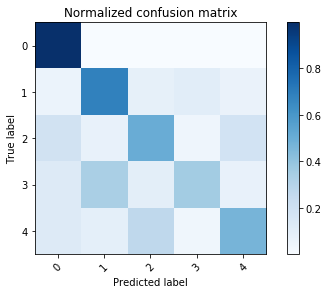

In [67]:
# Compute confusion matrix
y_compare = np.argmax(y_test, axis =1)
cm = confusion_matrix(y_compare, pred22)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, instances)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, instances, title='Normalized confusion matrix')

plt.show()

**CNN Model No. 5.2_weight**

In [21]:
from sklearn.metrics import plot_confusion_matrix

In [36]:
pred13_w = model13.predict(X_test, verbose=0)

In [37]:
y_compare_13_w = np.argmax(pred13_w,axis=1)

In [46]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues, 
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[3654   14   42   21   19]
 [  12  183   39   63   19]
 [  23   16   95   11   51]
 [   7   56   26   90   11]
 [  16   21   61   23   83]]
Normalized confusion matrix
[[0.97 0.   0.01 0.01 0.01]
 [0.04 0.58 0.12 0.2  0.06]
 [0.12 0.08 0.48 0.06 0.26]
 [0.04 0.29 0.14 0.47 0.06]
 [0.08 0.1  0.3  0.11 0.41]]


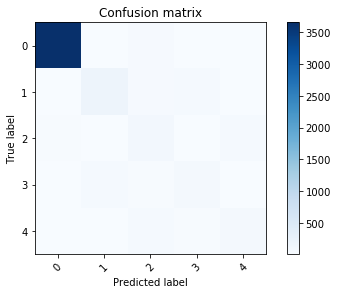

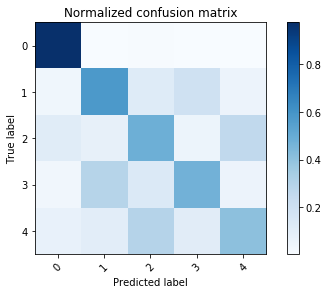

In [42]:
# Compute confusion matrix
y_compare = np.argmax(y_test, axis =1)
cm = confusion_matrix(y_compare, y_compare_13_w)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, instances)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, instances, title='Normalized confusion matrix')

plt.show()

In [65]:
# Compute confusion matrix
y_compare = np.argmax(y_test, axis =1)
cm = confusion_matrix(y_compare, y_compare_13_w)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, instances)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, instances, title='Normalized confusion matrix')

plt.show()




Confusion matrix, without normalization
[[3654   14   42   21   19]
 [  12  183   39   63   19]
 [  23   16   95   11   51]
 [   7   56   26   90   11]
 [  16   21   61   23   83]]


TypeError: plot_confusion_matrix() missing 1 required positional argument: 'y_true'

<Figure size 432x288 with 0 Axes>

**Binary Class**

In [166]:
model_bi = load_model('./pretrained_model/ConvNet1.h5')
predictions_bi = model_bi.predict(X_test, verbose=0)
pred_bi = np.argmax(predictions_bi,axis=1)
instances_bi = pd.Index(['0','1'])

Confusion matrix, without normalization
[[3750    0]
 [ 447  459]]
Normalized confusion matrix
[[1.   0.  ]
 [0.49 0.51]]


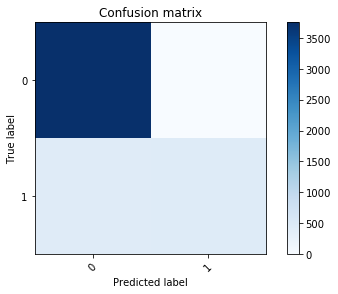

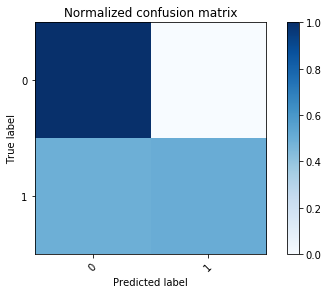

In [172]:
# Compute confusion matrix
y_compare_bi = np.argmax(y_test_bi, axis =1)
cm = confusion_matrix(y_compare_bi, pred_bi)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, instances_bi)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, instances_bi, title='Normalized confusion matrix')

plt.show()

**CNN Model No. 5.2**

In [250]:
#predictions21 = model21.predict(X_test, verbose=0)
pred22 = np.argmax(pred21,axis=1)
instances_bi = pd.Index(['0','1'])

Confusion matrix, without normalization
[[3737   13]
 [  98  808]]
Normalized confusion matrix
[[1.   0.  ]
 [0.11 0.89]]


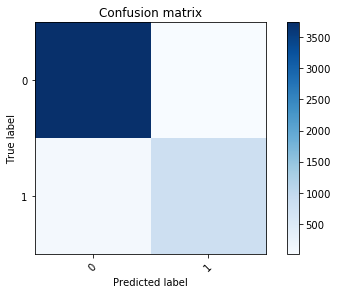

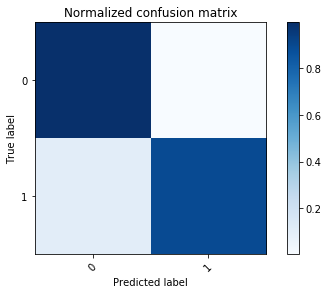

In [205]:
# Compute confusion matrix
y_compare_bi = np.argmax(y_test_bi, axis =1)
cm = confusion_matrix(y_compare_bi, pred21)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, instances_bi)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, instances_bi, title='Normalized confusion matrix')

plt.show()

## Precision, Recall, and F1 Score

In [230]:
from sklearn import metrics

**Binary Classisifcation**

In [173]:
print(metrics.confusion_matrix(y_compare_bi, pred_bi))

[[3750    0]
 [ 447  459]]


In [174]:
print(metrics.classification_report(y_compare_bi, pred_bi, digits=3))

              precision    recall  f1-score   support

           0      0.893     1.000     0.944      3750
           1      1.000     0.507     0.673       906

    accuracy                          0.904      4656
   macro avg      0.947     0.753     0.808      4656
weighted avg      0.914     0.904     0.891      4656



**CNN Model No. 5.2**

In [251]:
print(metrics.confusion_matrix(y_compare_bi, pred22))

[[3737   13]
 [  98  808]]


In [252]:
print(metrics.classification_report(y_compare_bi, pred22, digits=3))

              precision    recall  f1-score   support

           0      0.974     0.997     0.985      3750
           1      0.984     0.892     0.936       906

    accuracy                          0.976      4656
   macro avg      0.979     0.944     0.961      4656
weighted avg      0.976     0.976     0.976      4656



## Multiclass Classification

In [139]:
print(metrics.confusion_matrix(y_compare, pred))

[[3745    0    3    1    1]
 [  24  204   35   30   23]
 [  41   25   93    3   34]
 [  38   75   22   43   12]
 [  31   25   61    7   80]]


In [140]:
print(metrics.classification_report(y_compare, pred, digits=3))

              precision    recall  f1-score   support

           0      0.965     0.999     0.982      3750
           1      0.620     0.646     0.633       316
           2      0.435     0.474     0.454       196
           3      0.512     0.226     0.314       190
           4      0.533     0.392     0.452       204

    accuracy                          0.895      4656
   macro avg      0.613     0.547     0.567      4656
weighted avg      0.882     0.895     0.885      4656



**CNN Model No. 5.2**

In [183]:
print(metrics.confusion_matrix(y_compare, pred1))

[[3742    1    4    1    2]
 [  19  216   27   34   20]
 [  38   14   99    9   36]
 [  25   64   19   68   14]
 [  26   19   55    8   96]]


In [184]:
print(metrics.classification_report(y_compare, pred1, digits=3))

              precision    recall  f1-score   support

           0      0.972     0.998     0.985      3750
           1      0.688     0.684     0.686       316
           2      0.485     0.505     0.495       196
           3      0.567     0.358     0.439       190
           4      0.571     0.471     0.516       204

    accuracy                          0.907      4656
   macro avg      0.657     0.603     0.624      4656
weighted avg      0.898     0.907     0.901      4656



**CNN Model No. 5.3 class_weight**

In [43]:
print(metrics.confusion_matrix(y_compare, y_compare_13_w))

[[3654   14   42   21   19]
 [  12  183   39   63   19]
 [  23   16   95   11   51]
 [   7   56   26   90   11]
 [  16   21   61   23   83]]


In [45]:
print(metrics.classification_report(y_compare, y_compare_13_w, digits=3))

              precision    recall  f1-score   support

           0      0.984     0.974     0.979      3750
           1      0.631     0.579     0.604       316
           2      0.361     0.485     0.414       196
           3      0.433     0.474     0.452       190
           4      0.454     0.407     0.429       204

    accuracy                          0.882      4656
   macro avg      0.573     0.584     0.576      4656
weighted avg      0.888     0.882     0.884      4656



## Precision Recall Curve

In [141]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [154]:
n_classes = y_test.shape[1]

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],predictions5_1[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], predictions5_1[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    predictions5_1.ravel())
average_precision["micro"] = average_precision_score(y_test, predictions5_1,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.97


**Micro-Averaged Precision-Recall Curve** 

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.97')

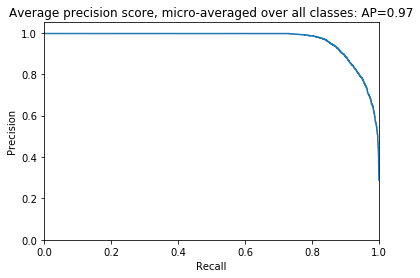

In [155]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

**Precision-Recall Curve for each class and iso-f1 curves**

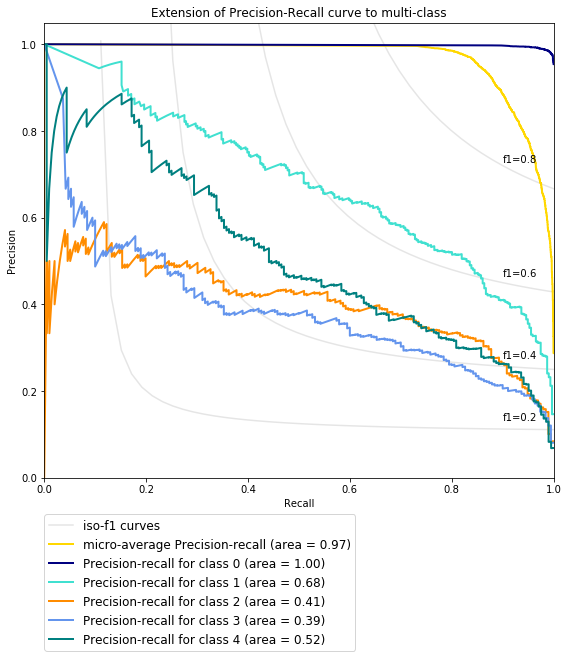

In [165]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(8,9))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=12))
plt.tight_layout()
plt.show()

**CNN Model No. 5.2**

In [191]:
n_classes = y_test.shape[1]

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],predictions5_2[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], predictions5_2[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    predictions5_2.ravel())
average_precision["micro"] = average_precision_score(y_test, predictions5_2,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.97


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.97')

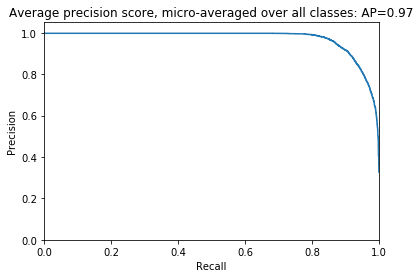

In [192]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

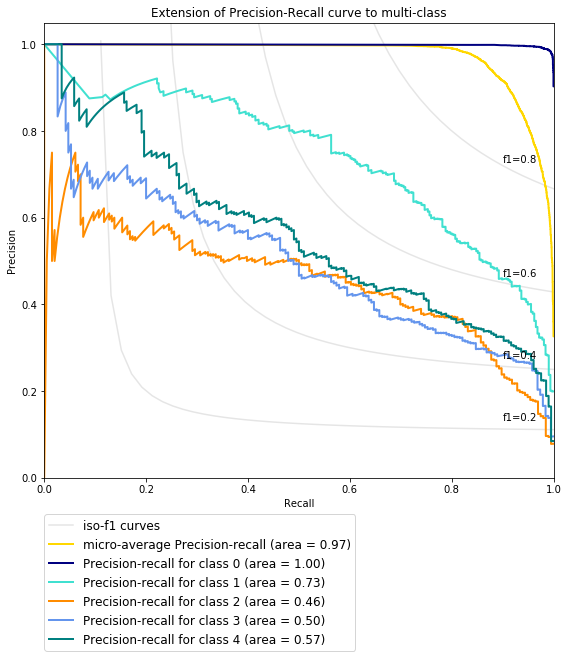

In [193]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(8,9))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=12))
plt.tight_layout()
plt.show()

## Predictions

In [35]:
y_test1 = np.load(os.path.join("Data/256", "y_test_labels_multi.npy"))

In [25]:
class_names = ['NORMAL', 'BENIGN_calcification', 'BENIGN_mass',
       'MALIGNANT_calcification', 'MALIGNANT_mass']

In [37]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i].reshape(256,256)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(5))
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

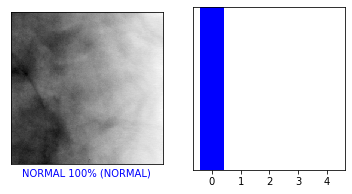

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred21[i], y_test1, X_test)
plt.subplot(1,2,2)
plot_value_array(i, pred21[i],  y_test1)
plt.show()

In [21]:
predictions2 = model2.predict(X_test, verbose=0)

In [43]:
y_test1 = np.load(os.path.join("Data/256", "y_test_labels_multi.npy"))

In [231]:
class_names = ['NORMAL', 'BENIGN_calcification', 'BENIGN_mass',
       'MALIGNANT_calcification', 'MALIGNANT_mass']

In [41]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i].reshape(256,256)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% \n ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(5))
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

**CNN Model No.5**

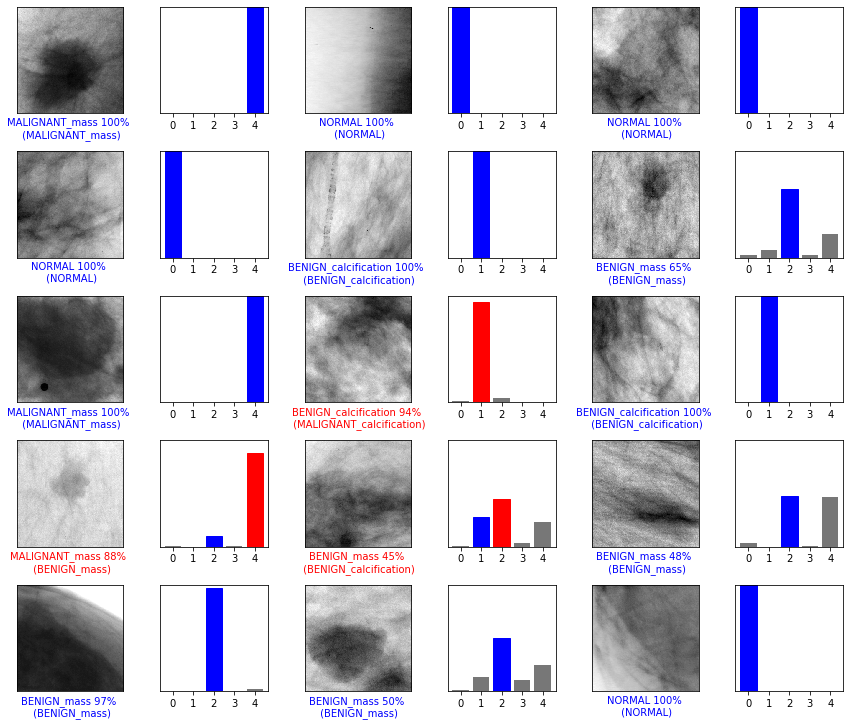

In [49]:
list1 = [2, 32, 81, 82, 103, 89, 5, 90, 104, 93, 100, 136, 139, 140, 121]
num_rows = 30
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i,j in enumerate(list1):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(j, pred21[j], y_test1, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(j, pred21[j], y_test1)
plt.tight_layout()
plt.show()

In [69]:
import keras
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

Using TensorFlow backend.


In [70]:
from tensorflow.keras.utils import plot_model

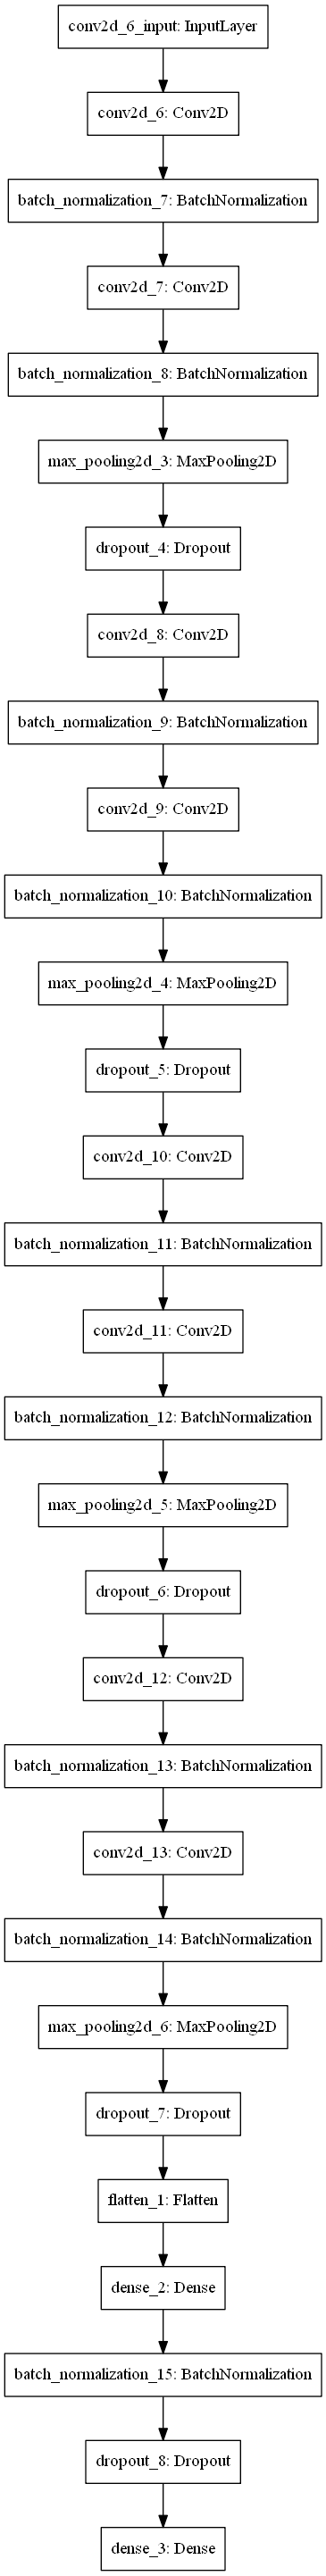

In [71]:

tf.keras.utils.plot_model(model_multi_52, to_file='model.png')

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model2).create(prog='dot', format='svg'))

In [229]:
predictions2 = model1.predict(X_test, verbose=0)

In [ ]:
num_rows = 30
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(0, 1500,1):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions2[i], y_test1, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions2[i], y_test1)
plt.tight_layout()
plt.show()